In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from Assignment_1.Assignment_1.Part_2_aero_design_functions import single_point_design, get_design_functions
from lacbox.io import load_ae, save_ae
from lacbox.test import test_data_path


In [2]:
"""Test single point design with a decrease in blade length"""

'Test single point design with a decrease in blade length'

In [3]:
"""List of changes to blade"""
"1: blade length reduced from original scale ratio 1.0388 -> 1.0194"
"2: tsr is changed based on single point design function 2 optimal tsr"
"3: Biggest blade chord is kept the same as DTU -> traveling constraint"
"4: tsr is chosen based on HAWC2S optimal"

'4: tsr is chosen based on HAWC2S optimal'

In [4]:
scale_ratio_blade = 1.0194 # NEW SCALE RATIO OF THE BLADE JIM_DESIGN

In [5]:
def read_data(file_path):
    """Reads a data file and extracts three columns of float data."""
    column_1, column_2, column_3 = [], [], []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            try:
                if ';' in line:
                    line = line.split(';')[0]  # Remove comments
                values = list(map(float, line.split()))
                if len(values) >= 3:
                    column_1.append(values[0])
                    column_2.append(values[1])
                    column_3.append(values[2])
            except ValueError:
                continue  # Skip lines with invalid data
    return np.array(column_1), np.array(column_2), np.array(column_3)

def plot_cp_ct(tsr_values, cp_list, ct_list, label="Design"):
    """Plots CP and CT as a function of TSR."""
    fig, ax = plt.subplots(2, 1, figsize=(6, 8))

    # Plot CP vs TSR
    ax[0].plot(tsr_values, cp_list, 'o-', label=f"{label} $C_P$")
    ax[0].set_ylabel("$C_P$ [-]")
    ax[0].set_xlabel("TSR [-]")
    ax[0].grid(True)
    ax[0].set_title(f"Power Coefficient vs TSR ({label})")
    ax[0].legend()

    # Plot CT vs TSR
    ax[1].plot(tsr_values, ct_list, 'o-', label=f"{label} $C_T$")
    ax[1].set_ylabel("$C_T$ [-]")
    ax[1].set_xlabel("TSR [-]")
    ax[1].grid(True)
    ax[1].set_title(f"Thrust Coefficient vs TSR ({label})")
    ax[1].legend()

    fig.tight_layout()
    plt.show()

def run_design(tsr_values, design_function_int=2.0, plot_comparison=False):
    """Runs the single-point design for a range of TSR values and plots CP and CT (new design)."""

    # File path and scaling factor for new design
    ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'
    
    
    """NEW SCALE RATIO OF THE BLADE HERE"""
    # scale_ratio_blade = 1.0194 

    """IDENTICAL TO OLD EXCEPT MAINTAIN MAX CHORD AS DTU """
    # Read new design data
    r, c_10mw, tc_10mw = read_data(ae_path)
    c_10mw *= scale_ratio_blade
    c_10mw[:4] = 5.38  # First 4 values of our design maintain identical chord
    c_10mw[4] = 5.386
    c_10mw[5] = 5.5
    t_10mw = tc_10mw[:-1] / 100 * c_10mw[:-1]
    r *= scale_ratio_blade

    r_hub = 2.8  # Hub radius [m]
    R = r_hub + r[-1]  # Rotor radius [m]
    r = r[:-1] + r_hub  # Adjust rotor span with hub radius
    
    """MAINTAINING DTU MAX CHORD"""
    # Max and root chord sizes
    chord_max = 6.20 
    chord_root = 5.38
    B = 3  # Number of blades

    # Aerodynamic polar design functions
    cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(design_function_int)

    # Loop through different TSR values and plot results
    cp_list, ct_list = [], []

    for tsr in tsr_values:
        # print(f"Running new design for TSR = {tsr}")

        # Perform the design for the current TSR
        chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
            r, t_10mw, tsr, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
        )

        # Store CP and CT values
        cp_list.append(CP)
        ct_list.append(CT)
    
    print(max(cp_list))
    index_max = cp_list.index(max(cp_list))
    print(f"Maximum tsr  ={tsr_values[index_max]}")

    # Plot CP and CT for new design
    if not plot_comparison:
        plot_cp_ct(tsr_values, cp_list, ct_list, label="New Design")
    return cp_list, ct_list  # Return for potential comparison

0.4597697976118447
Maximum tsr  =7.1313131313131315


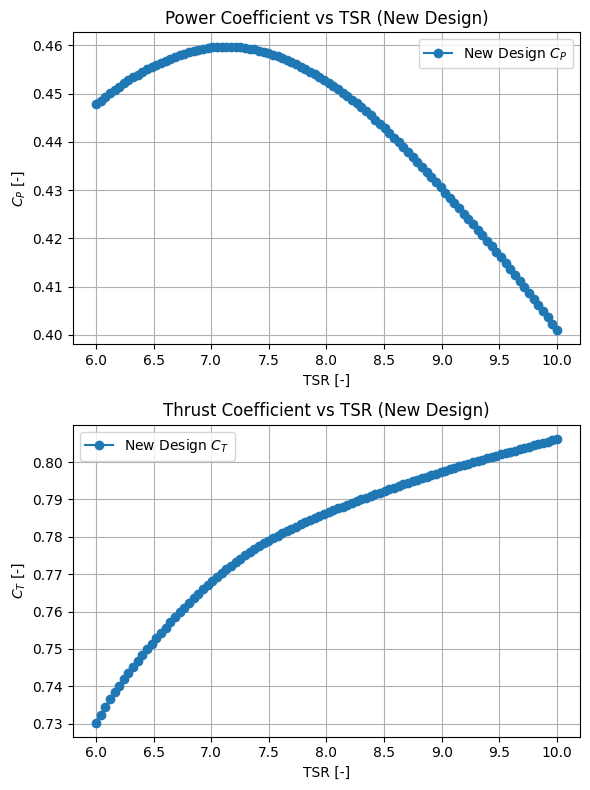

([0.44775658291301845,
  0.44855564365721484,
  0.4493253308878972,
  0.4500672753578773,
  0.45078273083122294,
  0.4514714553345139,
  0.4521329309168315,
  0.45276634192948056,
  0.45337097161142714,
  0.4539488430809902,
  0.4545001271996373,
  0.45502547164348156,
  0.45552453705440904,
  0.4559982157262216,
  0.45644580619811714,
  0.4568679206595666,
  0.45726370630249147,
  0.4576335308508117,
  0.45797646465859304,
  0.45829238501753145,
  0.45858048607657637,
  0.45884085523905355,
  0.4590733148803489,
  0.45927759378712685,
  0.4594535410378104,
  0.4595920899894314,
  0.45969019496199526,
  0.45974891203035695,
  0.4597697976118447,
  0.4597542096804983,
  0.45970322184710116,
  0.4596176551895546,
  0.45949828844425783,
  0.45934533455877924,
  0.45915970099043674,
  0.45894126086818615,
  0.4586911279102827,
  0.45840921061151196,
  0.45809648645083345,
  0.4577533386254614,
  0.4573800814202126,
  0.45697834766245876,
  0.45654821096912673,
  0.4560904238203763,
  0.455

In [6]:
# Define a range of TSR values to test
tsr_values = np.linspace(6, 10, 100)  # Example range of TSR values

# Run the comparison of old and new designs
run_design(tsr_values, design_function_int=2)

In [7]:
"""Updating this file to change parameters for new blade design"""

"""See line 58, removed scale ratio blade"""

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

In [8]:
""""""
tsr_max_cp = 7.13
# File path and scaling factor for new design
file_path = Path.cwd() / 'DTU_10MW_RWT_Assignment_1_ae.dat'

ae_path = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_ae.dat'

ae = load_ae(ae_path)

# Read new design data
r, c_10mw, tc_10mw, pcset = load_ae(ae_path, unpack=True)
# c_10mw *= scale_ratio_blade
c_10mw[:4] = 5.38  # First 4 values of our design maintain identical chord
c_10mw[4] = 5.386
c_10mw[5] = 5.5
t_input = tc_10mw[:-1] / 100 * c_10mw[:-1]
r *= scale_ratio_blade

print(c_10mw.argmax())

12


In [9]:
r_hub = 2.8  # Hub radius [m]
R = r_hub + r[-1]  # Rotor radius [m]
# print(R)
r_with_hub = r[:-1] + r_hub  # Adjust rotor span with hub radius

# Max and root chord sizes
chord_max = 6.20 #* scale_ratio_blade
chord_root = 5.38
B = 3  # Number of blades

# Aerodynamic polar design functions
cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(2)

# Perform the design for the TSR_max_cp
chord_BB, tc_BB, twist_BB, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
    r_with_hub, t_input, tsr_max_cp, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
        )

In [10]:

print(tc_BB)

# Define output file path for the updated .dat file
# output_file_path = Path.cwd() / 'JIM_DESIGN_BB_RWT_design.dat'

# print(len(r))
# print(r[-1])
# print(len(chord_BB))
# print(len(tc_BB))

# Write the updated data into the new .dat file

save_path = 'JIM_DESIGN_RWT_Blade_ae.dat'

# Convert numpy arrays to lists
chord_BB_list = chord_BB.tolist()
tc_BB_list = tc_BB.tolist()

"""Last element of the blade is interpolation of the previous element. """
# Perform linear fit for the last 5 elements of both chord_BB and tc_BB
last_5_indices = np.arange(len(chord_BB_list) - 5, len(chord_BB_list))

# Linear fit for chord_BB
chord_fit_coeff = np.polyfit(last_5_indices, chord_BB_list[-5:], 1)
next_index = len(chord_BB_list)
next_chord_value = np.polyval(chord_fit_coeff, next_index)  # Predict the next value


chord_BB_list.append(next_chord_value)
tc_BB_list.append(tc_BB_list[-1])

# Update the ae_new array with the new lists
ae_new = ae.copy()
ae_new[:, 0] = r  # Update radii
ae_new[:, 1] = np.array(chord_BB_list)  # Convert the list back to numpy array for assignment
ae_new[:, 2] = np.array(tc_BB_list)  # Convert the list back to numpy array for assignment

# Print updated data for verification
# print(ae_new)

# print(ae_new)

# Save the updated aerodynamic design data to a new file
save_ae(save_path, ae_new)

# print(tc_BB)
# print(r)
np.savetxt('tc_BB',tc_BB)
np.savetxt('Cl_single_point_design', cl)


[100.          99.69825169  95.44014734  93.43906102  90.38517083
  87.64915722  81.25377395  75.00849861  67.78291551  59.99920686
  52.48932308  46.14410622  41.13345803  37.31336887  34.34568879
  32.16433691  30.81735485  30.28997611  29.85418312  29.37051032
  28.8646118   28.35388141  27.85146039  27.36906152  26.91065175
  26.47967535  26.04390563  25.59019678  25.16254122  24.81819868
  24.63312183  24.63312183  24.63312183  24.63312183  24.63312183
  24.63312183  24.63312183  24.63312183  24.63312183]


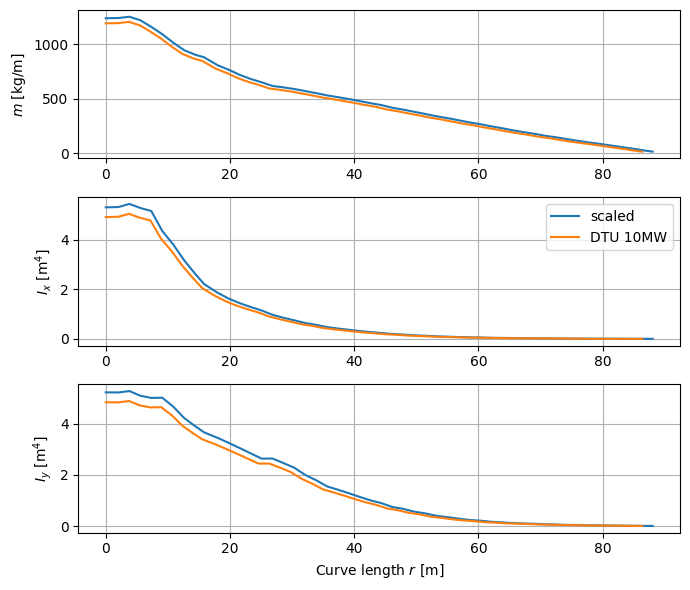

In [11]:
"""Script/module for scaling the HAWC2 ST-data

The file can be run directly which shows an example of how to scale the ST-data
The file can also be imported as a module where the `scale_ST_data` can be used in another script/notebook
"""
from pathlib import Path

import lacbox.io

def scale_ST_data(baseline_st_data, scale_factor):
    """Applying scaling for a baseline HAWC2 ST-file.

    Parameters
    ----------
    baseline_st_data : dict
        Dict containing the baseline ST-data. The ST-data can be loaded with `lacbox.load_st`
    scale_factor : float
        Scaling factor to apply for the ST-data. If scaling factor is using rotor span it can be computed as: `scale_factor = R_new/R_old`

    Returns
    -------
    dict
        The scaled ST-data. Can be written to file with `lacbox.save_st`
    """
    st_data = dict()
    st_data["s"] = baseline_st_data["s"] * scale_factor
    st_data["m"] = baseline_st_data["m"] * scale_factor**2
    st_data["x_cg"] = baseline_st_data["x_cg"] * scale_factor
    st_data["y_cg"] = baseline_st_data["y_cg"] * scale_factor
    st_data["ri_x"] = baseline_st_data["ri_x"] * scale_factor
    st_data["ri_y"] = baseline_st_data["ri_y"] * scale_factor
    st_data["x_sh"] = baseline_st_data["x_sh"] * scale_factor
    st_data["y_sh"] = baseline_st_data["y_sh"] * scale_factor
    st_data["E"] = baseline_st_data["E"]
    st_data["G"] = baseline_st_data["G"]
    st_data["I_x"] = baseline_st_data["I_x"] * scale_factor**4
    st_data["I_y"] = baseline_st_data["I_y"] * scale_factor**4
    st_data["I_p"] = baseline_st_data["I_p"] * scale_factor**4
    st_data["k_x"] = baseline_st_data["k_x"]
    st_data["k_y"] = baseline_st_data["k_y"]
    st_data["A"] = baseline_st_data["A"] * scale_factor**2
    st_data["pitch"] = baseline_st_data["pitch"]
    st_data["x_e"] = baseline_st_data["x_e"] * scale_factor
    st_data["y_e"] = baseline_st_data["y_e"] * scale_factor
    return st_data


if __name__ == "__main__":
    # %% Import modules
    import matplotlib.pyplot as plt
    from lacbox.io import load_st

    # %% Inputs
    # Baseline ST-data (DTU 10MW)
    path_st_file_DTU10MW = test_data_path + '/dtu_10_mw/data/DTU_10MW_RWT_Blade_st.dat'
    st_data_DTU10MW = load_st(path_st_file_DTU10MW, 0, 0)  # Baseline data
    
    # %% Scaling ST-data
    st_data = scale_ST_data(st_data_DTU10MW, scale_ratio_blade)

    # %% Plotting scaled and baseline data
    # Plotting m, I_x, I_y, I_p, S_chord, S_thickness
    fig, axs = plt.subplots(3, 1, figsize=(7, 6))
    # m_d
    ax = axs[0]
    ax.plot(st_data["s"], st_data["m"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["m"], label="DTU 10MW")
    ax.set_ylabel("$m$ [kg/m]")
    ax.grid()
    # I_x
    ax = axs[1]
    ax.plot(st_data["s"], st_data["I_x"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_x"], label="DTU 10MW")
    ax.set_ylabel("$I_x$ [m$^4$]")
    ax.grid()
    ax.legend()
    # I_y
    ax = axs[2]
    ax.plot(st_data["s"], st_data["I_y"], label="scaled")
    ax.plot(st_data_DTU10MW["s"], st_data_DTU10MW["I_y"], label="DTU 10MW")
    ax.set_ylabel("$I_y$ [m$^4$]")
    ax.set_xlabel("Curve length $r$ [m]")
    ax.grid()

    fig.tight_layout()
    plt.show()

    lacbox.io.save_st('JIM_DESIGN_RWT_Blade_st.dat',st_data=st_data)

In [12]:
print(r)
print(len(r))

[ 0.         2.0388     4.8034128  5.5006824  6.4415886  7.620015
  9.0298452 10.6608852 12.5059992 14.551935  16.7864598 19.1983602
 21.7703064 24.4890462 27.3372498 30.2975874 33.3537486 36.4853454
 39.675048  42.9024684 46.1502768 49.3970658 52.6244862 55.81215
 58.941708  61.994811  64.9520904 67.7962164 70.5098592 73.0777278
 75.4835118 77.7129396 79.7517396 81.5897178 83.2146414 84.6163164
 85.787607  86.720358  87.4094724 88.0415004]
40


In [13]:
from lacbox.io import load_c2def, save_c2def
from lacbox.test import test_data_path
import matplotlib.pyplot as plt
import numpy as np


htc_path = test_data_path + '/dtu_10_mw/DTU_10MW_RWT.htc'
c2_def = load_c2def(htc_path)

# # 27-piece dataset (last two columns)
# data_27_pieces = [
#     [4.44089E-16, -1.45000E+01],
#     [3.00000E+00, -1.45000E+01],
#     [6.00000E+00, -1.44851E+01],
#     [7.00004E+00, -1.44610E+01],
#     [8.70051E+00, -1.43388E+01],
#     [1.04020E+01, -1.40201E+01],
#     [1.22046E+01, -1.33904E+01],
#     [1.32065E+01, -1.29371E+01],
#     [1.50100E+01, -1.19445E+01],
#     [1.82151E+01, -9.98243E+00],
#     [2.14178E+01, -8.45147E+00],
#     [2.46189E+01, -7.46417E+00],
#     [2.78193E+01, -6.72916E+00],
#     [3.10194E+01, -6.08842E+00],
#     [3.42197E+01, -5.49322E+00],
#     [4.02204E+01, -4.39222E+00],
#     [4.66217E+01, -3.09315E+00],
#     [5.30232E+01, -1.75629E+00],
#     [5.94245E+01, -5.00650E-01],
#     [6.58255E+01, 6.01964E-01],
#     [7.22261E+01, 1.55560E+00],
#     [7.90266E+01, 2.51935E+00],
#     [8.05267E+01, 2.72950E+00],
#     [8.20271E+01, 2.93201E+00],
#     [8.35274E+01, 3.11874E+00],
#     [8.50277E+01, 3.28847E+00],
#     [8.63655E+01,	3.42796E+00]
# ]
#
#
# def reshape_column_to_27_pieces(data_39_pieces_col1, target_data_27_pieces_col1):
#     """
#     Reshapes the first column of the 39-piece dataset into 27 pieces with the same
#     relative difference in distance as the target 27-piece dataset.
#
#     Parameters:
#     - data_39_pieces_col1: List of values from the first column of the 39-piece dataset.
#     - target_data_27_pieces_col1: List of values from the first column of the target 27-piece dataset.
#
#     Returns:
#     - Reshaped 27-piece data for the first column.
#     """
#     # Normalized indices for the 39-piece and 27-piece data
#     x_39 = np.linspace(0, 1, len(data_39_pieces_col1))
#     x_27 = np.linspace(0, 1, len(target_data_27_pieces_col1))
#
#     # Interpolate the 39-piece data to 27 pieces
#     interpolate_func = interp1d(x_39, data_39_pieces_col1, kind='linear')
#     reshaped_27_col1 = interpolate_func(x_27)
#
#     return reshaped_27_col1
#
#
# # Example data (first column of the new 39-piece dataset)
# data_39_pieces_col1 = [
#     0.0000E+00, 2.0777E+00, 4.8950E+00, 5.6056E+00, 6.5644E+00, 7.7653E+00, 9.2020E+00,
#     1.0864E+01, 1.2744E+01, 1.4829E+01, 1.7107E+01, 1.9564E+01, 2.2185E+01, 2.4956E+01,
#     2.7858E+01, 3.0875E+01, 3.3990E+01, 3.7181E+01, 4.0431E+01, 4.3720E+01, 4.7030E+01,
#     5.0339E+01, 5.3628E+01, 5.6876E+01, 6.0065E+01, 6.3177E+01, 6.6190E+01, 6.9089E+01,
#     7.1854E+01, 7.4471E+01, 7.6923E+01, 7.9195E+01, 8.1272E+01, 8.3145E+01, 8.4801E+01,
#     8.6230E+01, 8.7423E+01, 8.8374E+01
# ]
#
#
# # Example target data (first column of the 27-piece dataset you provided earlier)
# target_data_27_pieces_col1 = [
#     4.44089E-16, 3.00000E+00, 6.00000E+00, 7.00004E+00, 8.70051E+00, 1.04020E+01, 1.22046E+01,
#     1.32065E+01, 1.50100E+01, 1.82151E+01, 2.14178E+01, 2.46189E+01, 2.78193E+01, 3.10194E+01,
#     3.42197E+01, 4.02204E+01, 4.66217E+01, 5.30232E+01, 5.94245E+01, 6.58255E+01, 7.22261E+01,
#     7.90266E+01, 8.05267E+01, 8.20271E+01, 8.35274E+01, 8.50277E+01, 8.63655E+01
# ]
#
# # Reshape the first column of the 39-piece data to match the 27-piece structure
# reshaped_27_col1 = reshape_column_to_27_pieces(data_39_pieces_col1, target_data_27_pieces_col1)
#
# target_twist_39 = [20.,         20. ,        20.  ,       20.   ,      20.,         20.,
#  20.   ,      20.  ,       20.     ,    20.  ,       19.93012779 ,17.38105656,
#  14.60433568 ,11.88843532 , 9.18062142 , 6.50975033 , 4.7714802  , 3.66577912,
#   2.73069462 , 1.89225188 , 1.14105808 , 0.47106307 ,-0.12428942 ,-0.65080625,
#  -1.11517968, -1.52349385, -1.884398,   -2.2025173 , -2.47778103, -2.71258817,
#  -2.91155519, -3.08081674 ,-3.22781436, -3.35439884 ,-3.46191378, -3.55152144,
#  -3.62427552, -3.68088139, -3.72196621]
#
# for index, value in enumerate(target_twist_39):
#     target_twist_39[index] = -value
#
#
# reshaped_twist = reshape_column_to_27_pieces(target_twist_39 , data_27_pieces[:][1])
#
# # Print the reshaped 27 pieces
# for value in reshaped_27_col1:
#     print(value)


# 39 data points (x-values and y-values)


"""Array with updated radial positions, ie JIM_DESIGN_ae"""
# r_39 = np.array([0., 2.07767195, 4.89499511, 5.60555892, 6.56440452, 7.76529891,
#                  9.20200906, 10.86414662, 12.74443974, 14.82938354, 17.10651199,
#                  19.56439791, 22.18538107, 24.95595662, 27.85846433, 30.875244,
#                  33.98967425, 37.18097837, 40.43149613, 43.72045083, 47.03018224,
#                  50.33887482, 53.62782952, 56.87626961, 60.06549605, 63.1768098,
#                  66.19047296, 69.08882533, 71.85420669, 74.47103451, 76.92268741,
#                  79.19462169, 81.27229364, 83.1453149, 84.80121944, 86.22961891,
#                  87.42324144, 88.37377636, 89.07602948])

r_39 = r[:-1]

"""Array with twists from single point design"""
# twist_39 = np.array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
#                  19.93012779, 17.38105656, 14.60433568, 11.88843532,
#                  9.18062142, 6.50975033, 4.7714802, 3.66577912, 2.73069462,
#                  1.89225188, 1.14105808, 0.47106307, -0.12428942, -0.65080625,
#                  -1.11517968, -1.52349385, -1.884398, -2.2025173, -2.47778103,
#                  -2.71258817, -2.91155519, -3.08081674, -3.22781436,
#                  -3.35439884, -3.46191378, -3.55152144, -3.62427552,
#                  -3.68088139, -3.72196621])

twist_39 = twist_BB

"""
# Target r-values (27 data points) from master.htc file with scaled factor"""
r_27 = scale_ratio_blade * np.array([4.44089E-16, 3.00000E+00, 6.00000E+00, 7.00004E+00, 8.70051E+00,
                 1.04020E+01, 1.22046E+01, 1.32065E+01, 1.50100E+01, 1.82151E+01,
                 2.14178E+01, 2.46189E+01, 2.78193E+01, 3.10194E+01, 3.42197E+01,
                 4.02204E+01, 4.66217E+01, 5.30232E+01, 5.94245E+01, 6.58255E+01,
                 7.22261E+01, 7.90266E+01, 8.05267E+01, 8.20271E+01, 8.35274E+01,
                 8.50277E+01, 8.63655E+01])

# Interpolating the y-values from 39 points to match 27 points
twist_27_interp = np.interp(r_27, r_39, twist_39)

# Print the interpolated twist value
# print(twist_27_interp)

"""Actual twist is negative inside hawc2 so we put the minus sign"""
twist_27 = -twist_27_interp

# print(twist_27)

"""New blade length, still kinda wtf because the aero_ae.dat is different"""
# print(r_27)

c2_def_new = c2_def.copy()
c2_def_new[:, 2] = r_27
c2_def_new[:, -1] = twist_27


print(c2_def_new)
# print(c2_def)
save_path = 'JIM_c2_def_updated.txt'

save_c2def(save_path, c2_def_new)

print(twist_BB)


[[ 0.00000000e+00  7.00600000e-05  4.52704327e-16 -2.00000000e+01]
 [-2.06477000e-05 -1.22119000e-02  3.05820000e+00 -2.00000000e+01]
 [-7.28810000e-03 -2.49251000e-02  6.11640000e+00 -2.00000000e+01]
 [-1.89235000e-02 -2.73351000e-02  7.13584078e+00 -2.00000000e+01]
 [-5.41282000e-02 -2.82163000e-02  8.86929989e+00 -2.00000000e+01]
 [-1.26633000e-01 -2.13210000e-02  1.06037988e+01 -2.00000000e+01]
 [-2.25666000e-01 -1.28378000e-02  1.24413692e+01 -2.00000000e+01]
 [-2.88563000e-01 -7.70659000e-03  1.34627061e+01 -2.00000000e+01]
 [-3.99194000e-01 -4.88317000e-03  1.53011940e+01 -1.98822096e+01]
 [-5.76634000e-01 -1.80296000e-02  1.85684729e+01 -1.77793106e+01]
 [-7.07136000e-01 -5.01772000e-02  2.18333053e+01 -1.43055451e+01]
 [-7.91081000e-01 -9.41228000e-02  2.50965067e+01 -1.11402581e+01]
 [-8.37195000e-01 -1.48880000e-01  2.83589944e+01 -8.15313890e+00]
 [-8.53948000e-01 -2.14514000e-01  3.16211764e+01 -5.66217556e+00]
 [-8.49367000e-01 -2.90618000e-01  3.48835622e+01 -4.11606636e